In [38]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv("diamantes.csv")

In [40]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


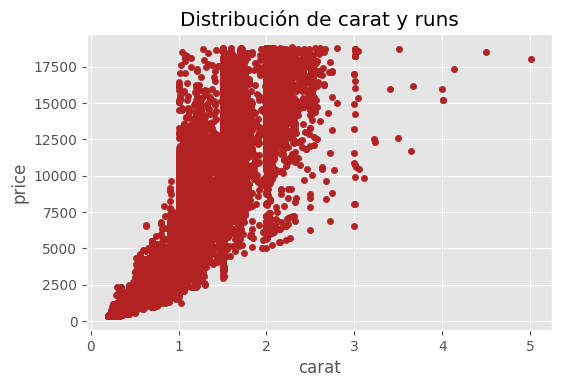

In [42]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

column = 'carat'

df.plot(
    x    = column,
    y    = 'price',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title(f'Distribución de {column} y runs');

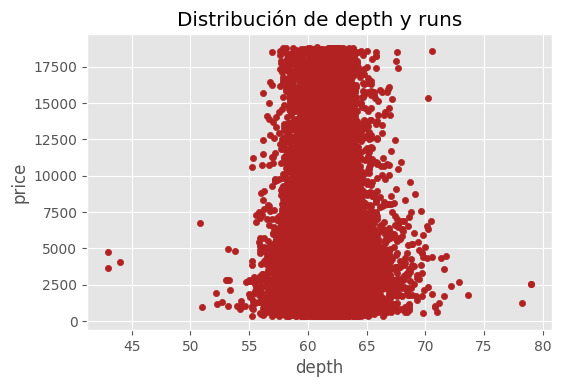

In [43]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

column = 'depth'

df.plot(
    x    = column,
    y    = 'price',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title(f'Distribución de {column} y runs');

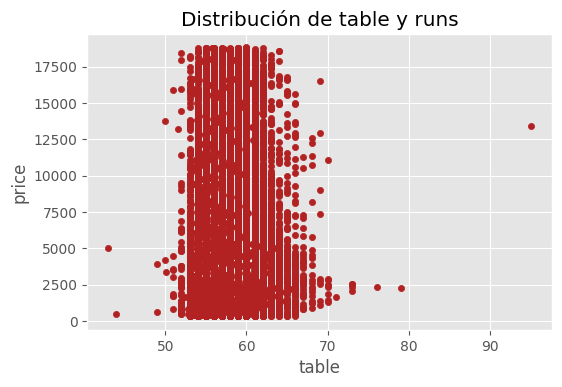

In [44]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

column = 'table'

df.plot(
    x    = column,
    y    = 'price',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title(f'Distribución de {column} y runs');

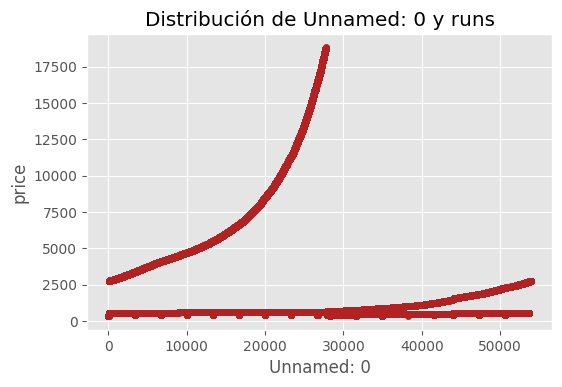

In [45]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

column = 'Unnamed: 0'

df.plot(
    x    = column,
    y    = 'price',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title(f'Distribución de {column} y runs');

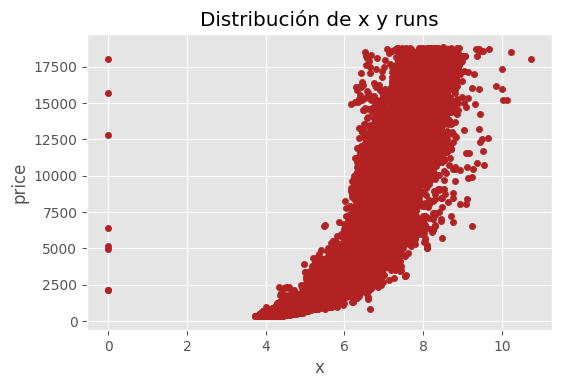

In [46]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

column = 'x'

df.plot(
    x    = column,
    y    = 'price',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title(f'Distribución de {column} y runs');

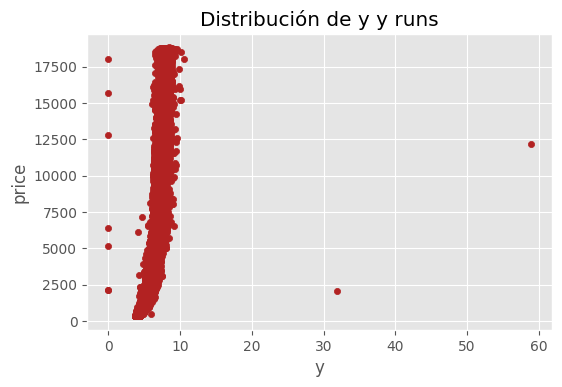

In [47]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

column = 'y'

df.plot(
    x    = column,
    y    = 'price',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title(f'Distribución de {column} y runs');

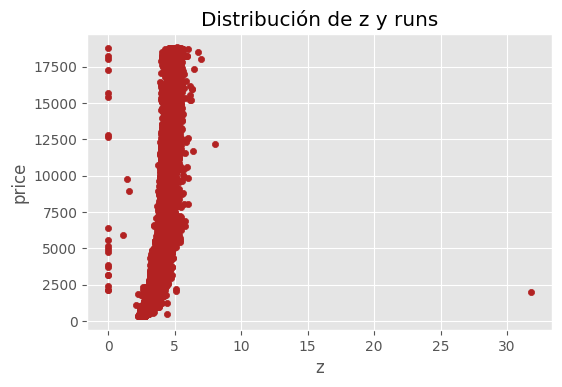

In [48]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

column = 'z'

df.plot(
    x    = column,
    y    = 'price',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title(f'Distribución de {column} y runs');

In [49]:
# División de los datos en train y test
# ==============================================================================
X = df[['carat']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [50]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df['carat'], y =  df['price'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.9215913011934769
P-value:  0.0


In [51]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [-2249.34620257]
Coeficiente: [('carat', np.float64(7752.926911861107))]
Coeficiente de determinación R^2: 0.8493292332893969


In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicciones
y_pred = modelo.predict(X_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Raíz del Error Cuadrático Medio
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')
print(f'Precio mínimo: {min(y)}')
print(f'Precio máximo: {max(y)}')
print(f'Precio promedio: {np.mean(y).round(2)}')

MAE: 1018.3936014077348
MSE: 2460013.6330612055
RMSE: 1568.4430601909671
R²: 0.8485175931796347
Precio mínimo: 326
Precio máximo: 18823
Precio promedio: 3932.8


In [53]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [54]:
cols = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

In [55]:
df_train = df[cols]

<Axes: >

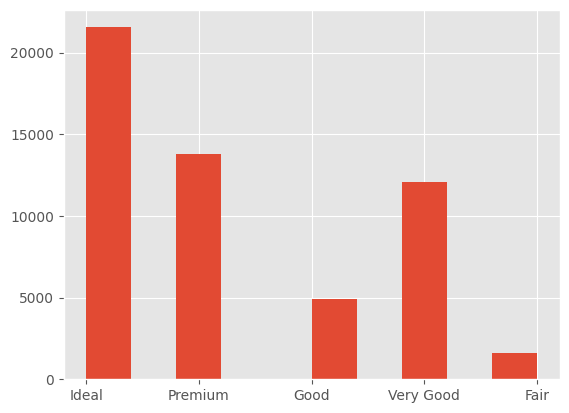

In [56]:
df_train['cut'].hist()

<Axes: >

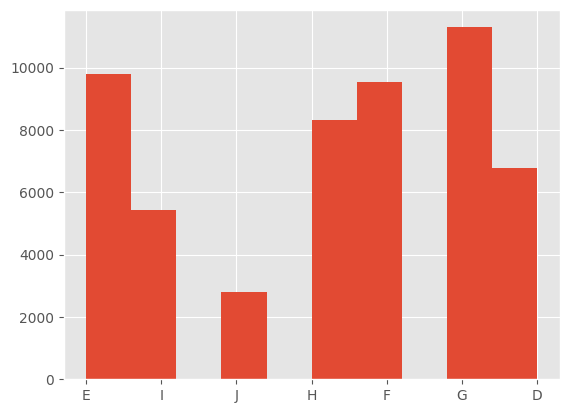

In [57]:
df_train['color'].hist()

<Axes: >

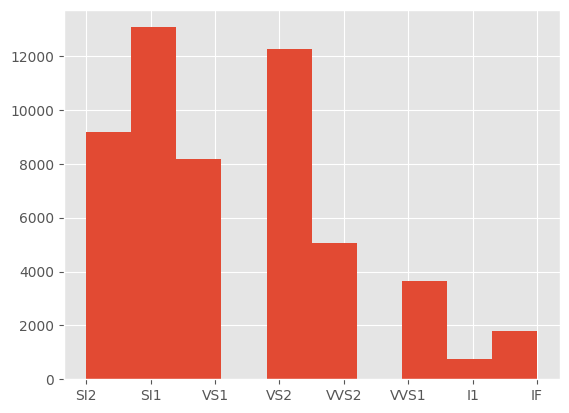

In [58]:
df_train['clarity'].hist()

In [59]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

ordinal_encoder = OrdinalEncoder()
one_hot_endocer = OneHotEncoder(drop='first')

encoded_cut_clarity = ordinal_encoder.fit_transform(df[['cut', 'clarity']])
encoded_color = one_hot_endocer.fit_transform(df[['color']]).toarray()


df['encoded_clarity'] = encoded_cut_clarity[:, 1]

In [60]:
# Convertir el resultado en un DataFrame
df_color_encoded =  pd.DataFrame(encoded_color, columns=one_hot_endocer.get_feature_names_out(['color']))


In [61]:
df['encoded_cut'] = encoded_cut_clarity[:, 0]

In [62]:
df = df.drop(['color', 'clarity', 'cut'], axis=1)

In [63]:
df2 = df.copy()

In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       53940 non-null  int64  
 1   carat            53940 non-null  float64
 2   depth            53940 non-null  float64
 3   table            53940 non-null  float64
 4   price            53940 non-null  int64  
 5   x                53940 non-null  float64
 6   y                53940 non-null  float64
 7   z                53940 non-null  float64
 8   encoded_clarity  53940 non-null  float64
 9   encoded_cut      53940 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 4.1 MB


In [65]:
df3 = df2.copy()

In [66]:
df4 = pd.concat([df3, df_color_encoded], axis=1)

In [67]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       53940 non-null  int64  
 1   carat            53940 non-null  float64
 2   depth            53940 non-null  float64
 3   table            53940 non-null  float64
 4   price            53940 non-null  int64  
 5   x                53940 non-null  float64
 6   y                53940 non-null  float64
 7   z                53940 non-null  float64
 8   encoded_clarity  53940 non-null  float64
 9   encoded_cut      53940 non-null  float64
 10  color_E          53940 non-null  float64
 11  color_F          53940 non-null  float64
 12  color_G          53940 non-null  float64
 13  color_H          53940 non-null  float64
 14  color_I          53940 non-null  float64
 15  color_J          53940 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 6.6 MB


In [68]:
# Selección de las características (X) y la variable objetivo (y)
X = df4.drop('price', axis=1)
y = df4['price']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234, shuffle=True)

# Creación del modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Raíz del Error Cuadrático Medio
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f'Intercept: {modelo.intercept_}')
print(f'Coeficientes: {modelo.coef_}')
print(f'Coeficiente de determinación R²: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

Intercept: 14706.554301814722
Coeficientes: [ 7.00024546e-03  1.11329233e+04 -1.46109439e+02 -8.73890223e+01
 -1.20356920e+03  4.89872261e+01  3.40125185e+00  2.78603540e+02
  7.34353612e+01 -1.72463174e+02 -1.32031886e+02 -2.19732038e+02
 -7.88722142e+02 -1.20102437e+03 -2.06557328e+03]
Coeficiente de determinación R²: 0.8887460459894179
MAE: 848.4401603731643
MSE: 1806719.6669415608
RMSE: 1344.1427256588345


In [ ]:
import lazypredict